## Setup

In [34]:
# Common imports
import numpy as np
import pandas as pd
import os

#to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save figures
PROJECT_ROOT_DIR = ''
CHAPTER_ID = 'classification'

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, 'images', fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format="png", dpi=300)

In [35]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000] 

In [36]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8)
    sort_by_target(mnist)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]
    

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [37]:
mnist.data.shape

(70000, 784)

In [38]:
X,y = mnist["data"], mnist["target"]

In [39]:
y.shape

(70000,)

Saving figure some_digit_plot


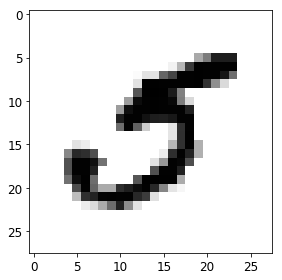

In [40]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis="off"
save_fig("some_digit_plot")
plt.show()

In [41]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=mpl.cm.binary, interpolatin="nearest")
    plt.axis="off"

In [68]:
def plot_images(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis = 'off'

0
Saving figure more_digits_plot


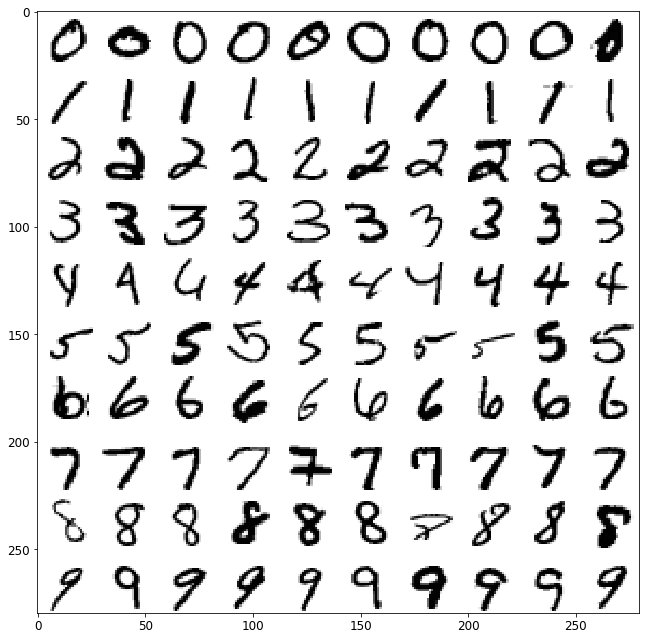

In [69]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_images(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [70]:
y[36000]

5

In [71]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [72]:
shuffle_index = np.random.permutation(60000)
X_train , y_train = X_train[shuffle_index], y_train[shuffle_index]

## Binary Classifier

In [74]:
# This will 
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [75]:
len(y_train_5)

60000

In [78]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [80]:
sgd_clf.predict([some_digit])

array([ True])

In [83]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9502 , 0.96565, 0.96495])

In [86]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Basically we trained our model to detect number 5 and tell if its 5 or not

Cross validation gives is score 95% accuracy! Which is good, but this might be not accurate even tho score is high. Best way to evaluate this score is to use Confusion matrix

Confusion matrix will show us number of 

True Negatives (TN), False Positives (FP)  
False Negatives(FN), True Positives (TP)

In [88]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]])

TN (53272) FP (1307)  
FP (1077)  TP (4344)  

Ideally this matrix should look like this  
| 1 | 2 |  
|---|---|  
| 3 | 4 |  

Sometimes you want to have more concise metrics that will show you level of accuracy which is called _precision_

*Precision* = TP / TP + FP

In [91]:
p = 4344 / (4344 + 1307)
p

0.7687135020350381

In [90]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5,  y_train_pred)

0.7687135020350381

The other metric is called *recall*. Recall score is *sensivity* or *true positive rate* essentially defines how classifier correctly deteced instances  

*recall* = TP / TP + FN

In [92]:
r = 4344 / (4344 + 1077)
r

0.801328168234643

In [93]:
recall_score(y_train_5, y_train_pred)

0.801328168234643

Sometimes its convitient to combine two scores when comparing classifier. This is called *f1* score which is *harmonic mean* of precision and recall. This score will only be high is both recall and preicison scores are high.  

*f1* = TP / (TP + ((FN + FP) / 2)

In [96]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7846820809248555

In [98]:
import sklearn
sklearn.__version__

'0.20.3'

## Precision/Recall Tradeoff

Classifier decides whether to assign a positive value to an instance when it passes certain threshold. Manipulating that threshold can increase recall, however it can also decrase precision.

In [100]:
y_scores = sgd_clf.decision_function([some_digit])
threshold = 0
y_scores

array([161855.74572176])

In [101]:
# Now lets see how prediction works on threshold = 0

y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [103]:
# Let's now check how prediction will work is threshold is 200000
threshold = 200000 

y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [104]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [106]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

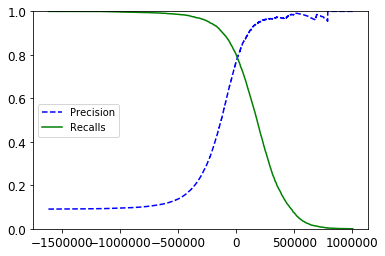

In [107]:
def plot_precision_recall_vs_threhold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recalls")
    plt.xlabel="Threhold"
    plt.legend(loc="center left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threhold(precisions, recalls, thresholds)
plt.show()